In [13]:
import pandas as pd
import numpy as np

In [9]:
# From https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

def plot_sil(X, ks):
    for i, k in enumerate(ks):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        labels = km.fit_predict(X)
        centroids = km.cluster_centers_

        # Get silhouette samples
        silhouette_vals = silhouette_samples(df, labels)

        # Silhouette plot
        y_ticks = []
        y_lower, y_upper = 0, 0
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
            ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
            y_lower += len(cluster_silhouette_vals)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals)
        ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
        ax1.set_yticks([])
        ax1.set_xlim([-0.1, 1])
        ax1.set_xlabel('Silhouette coefficient values')
        ax1.set_ylabel('Cluster labels')
        ax1.set_title('Silhouette plot for the various clusters', y=1.02);

        # Scatter plot of data colored with labels
#         ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
#         ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlim([-2, 2])
#         ax2.set_xlabel('Eruption time in mins')
#         ax2.set_ylabel('Waiting time to next eruption')
#         ax2.set_title('Visualization of clustered data', y=1.02)
#         ax2.set_aspect('equal')
        plt.tight_layout()
        plt.suptitle(f'Silhouette analysis using k = {k}',
                     fontsize=16, fontweight='semibold', y=1.05);

In [32]:
km = KMeans(n_clusters=10, n_jobs=-1)

labels = km.fit_predict(X)

# ks = [5, 10, 15, 20, 25]

# plot_sil(X, ks)

In [24]:
# A different take on plotting silhouette score

def plot2(X, ks):
    for n_clusters in ks:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            cmap = cm.get_cmap("nipy_spectral")
            color = cmap(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [31]:
# ks = [2,3,4,5]
# plot2(X[:,:10], ks)

In [1]:
# Plot line of avg sil score

def plot_avg_sil_score(X, ks, iterations, verbose=False, savepath=None):
    df = pd.DataFrame(columns=ks)

    for i in range(iterations):
        sil_scores = []
        for k in ks:
            km = KMeans(n_clusters=k, n_jobs=-1)
            labels = km.fit_predict(X)    
            silhouette_vals = silhouette_samples(X, labels)
            avg_score = np.mean(silhouette_vals)
            sil_scores.append(avg_score)
        df.loc[i] = sil_scores
        if verbose:
            print(f'Iteration {i} Complete')
            
    fig, ax = plt.subplots(figsize=(9,5))
    ax = df.mean().plot(ax=ax)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Average Silhouette Score')
    ax.set_title(f'Avg Silhouette Score over {iterations} iterations')
    if savepath:
        fig.savefig(savepath)
    return df

Iteration 0 Complete
Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete
Iteration 6 Complete
Iteration 7 Complete
Iteration 8 Complete
Iteration 9 Complete


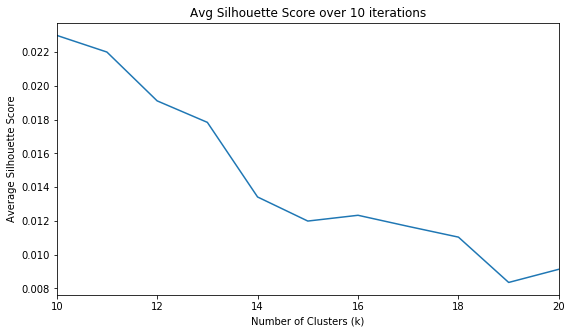

In [62]:
ks = range(10,21)

score_df = plot_avg_sil_score(X, ks, 10, verbose=True, 
                        savepath='../images/avg_sil_full_features.png')

In [210]:
# Hacked up code from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.matshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [211]:
# Run Random Forest and get confusion matrix

def rf_score_and_cm(df, full_df, n_topics, holdout='swb'):
    keep = [c for c in df.columns if prefix not in c]
    X = MinMaxScaler().fit_transform(df[keep])  

    nmf = NMF(n_components=n_topics, random_state=0,
              alpha=.3, l1_ratio=.5).fit(X)

    W = nmf.transform(X)
    
    target = holdout + '_target'
    y = full_df[target]

    model = RandomForestClassifier(n_estimators=100)
    score = cross_val_score(model, W, y, cv=5, scoring='f1_weighted', n_jobs=-1)
    score = np.mean(score)
    print(f'f1_weighted: {score}')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    ax = plot_confusion_matrix(y_test, preds)
    
    return confusion_matrix(y_test, preds)


f1_weighted: 0.638913134165139


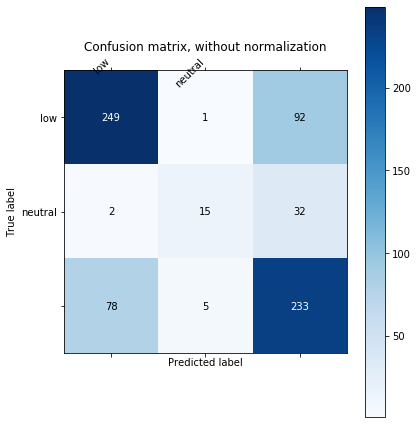

In [212]:
cm = rf_score_and_cm(df, full_df, 7, 'swb');